# Data Science Fundamentals

## Filter and Select data with Pandas

In [1]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [6]:
#create series object
s = Series(np.arange(8), index=['row1', 'row2', 'row3', 'row4', 'row5', 'row6', 'row7', 'row8'])
s

row1    0
row2    1
row3    2
row4    3
row5    4
row6    5
row7    6
row8    7
dtype: int64

In [7]:
#label indexing
s['row7']

6

In [8]:
#integer indexing
s[1:7:2]

row2    1
row4    3
row6    5
dtype: int64

In [10]:
#create dataframe
df = DataFrame(np.random.rand(36).reshape((6,6)), index=['row1', 'row2', 'row3', 'row4', 'row5', 'row6'],
               columns=['c1', 'c2', 'c3', 'c4', 'c5', 'c6'])
df
    

,c1,c2,c3,c4,c5,c6
row1,0.771321,0.020752,0.633648,0.748804,0.498507,0.224797
row2,0.198063,0.760531,0.169111,0.088340,0.685360,0.953393
row3,0.003948,0.512192,0.812621,0.612526,0.721755,0.291876
row4,0.917774,0.714576,0.542544,0.142170,0.373341,0.674134
row5,0.441833,0.434014,0.617767,0.513138,0.650397,0.601039
row6,0.805223,0.521647,0.908649,0.319236,0.090459,0.300700


In [14]:
#loc method
df.loc[['row2', 'row5'], ['c5', 'c2']]

,c5,c2
row2,0.685360,0.760531
row5,0.650397,0.434014


In [17]:
#data slicing
df['row3':'row7']

,c1,c2,c3,c4,c5,c6
row3,0.003948,0.512192,0.812621,0.612526,0.721755,0.291876
row4,0.917774,0.714576,0.542544,0.142170,0.373341,0.674134
row5,0.441833,0.434014,0.617767,0.513138,0.650397,0.601039
row6,0.805223,0.521647,0.908649,0.319236,0.090459,0.300700


In [18]:
#boolean operators
df < .5

,c1,c2,c3,c4,c5,c6
row1,False,True,False,False,True,True
row2,True,False,True,True,False,False
row3,True,False,False,False,False,True
row4,False,False,False,True,True,False
row5,True,True,False,False,False,False
row6,False,False,False,True,True,True


In [21]:
#selecting columns
df2 = df[['c5', 'c6']]
df2

,c5,c6
row1,0.498507,0.224797
row2,0.685360,0.953393
row3,0.721755,0.291876
row4,0.373341,0.674134
row5,0.650397,0.601039
row6,0.090459,0.300700


### Missing Values

In [22]:
s = Series(['row1', 'row2', np.nan, 'row4', 'row5', 'row6', np.nan, 'row8'])
s

0    row1
1    row2
2     NaN
3    row4
4    row5
5    row6
6     NaN
7    row8
dtype: object

In [24]:
#isnull method
s.isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
dtype: bool

In [27]:
df = DataFrame(np.random.randn(36).reshape(6,6))
df.loc[2:6, 0] = np.nan
df.loc[3:4, 3] = np.nan
df

,0,1,2,3,4,5
0,-0.144367,-0.400138,-0.295984,0.848209,0.706830,-0.787269
1,0.292941,-0.470807,2.404326,-0.739357,-0.312829,-0.348882
2,NaN,0.141104,0.273049,-1.618571,-0.573113,-1.320448
3,NaN,2.465325,1.383232,NaN,1.022516,0.166810
4,NaN,0.667890,-0.229947,NaN,-0.639963,0.313831
5,NaN,-0.221793,1.339926,0.029310,1.985386,1.447166


In [28]:
#fillna method
df2 = df.fillna(0)
df2

,0,1,2,3,4,5
0,-0.144367,-0.400138,-0.295984,0.848209,0.706830,-0.787269
1,0.292941,-0.470807,2.404326,-0.739357,-0.312829,-0.348882
2,0.000000,0.141104,0.273049,-1.618571,-0.573113,-1.320448
3,0.000000,2.465325,1.383232,0.000000,1.022516,0.166810
4,0.000000,0.667890,-0.229947,0.000000,-0.639963,0.313831
5,0.000000,-0.221793,1.339926,0.029310,1.985386,1.447166


In [29]:
df2 = df.fillna({0: 0.5, 3: 700})
df2

,0,1,2,3,4,5
0,-0.144367,-0.400138,-0.295984,0.848209,0.706830,-0.787269
1,0.292941,-0.470807,2.404326,-0.739357,-0.312829,-0.348882
2,0.500000,0.141104,0.273049,-1.618571,-0.573113,-1.320448
3,0.500000,2.465325,1.383232,700.000000,1.022516,0.166810
4,0.500000,0.667890,-0.229947,700.000000,-0.639963,0.313831
5,0.500000,-0.221793,1.339926,0.029310,1.985386,1.447166


In [31]:
#ffill within fillna
df2 = df.fillna(method='ffill')
df2

,0,1,2,3,4,5
0,-0.144367,-0.400138,-0.295984,0.848209,0.706830,-0.787269
1,0.292941,-0.470807,2.404326,-0.739357,-0.312829,-0.348882
2,0.292941,0.141104,0.273049,-1.618571,-0.573113,-1.320448
3,0.292941,2.465325,1.383232,-1.618571,1.022516,0.166810
4,0.292941,0.667890,-0.229947,-1.618571,-0.639963,0.313831
5,0.292941,-0.221793,1.339926,0.029310,1.985386,1.447166


In [32]:
#count missing values
df.isnull().sum()    

0    4
1    0
2    0
3    2
4    0
5    0
dtype: int64

In [33]:
#dropna method - drop rows or columns (axis=0 for rows axis=1 for columns)
df2 = df.dropna()
df2

,0,1,2,3,4,5
0,-0.144367,-0.400138,-0.295984,0.848209,0.706830,-0.787269
1,0.292941,-0.470807,2.404326,-0.739357,-0.312829,-0.348882


### Duplicates

In [34]:
df = DataFrame({'col1': [1, 1, 2, 2, 3, 3, 3],
               'col2': ['a', 'a', 'b', 'b', 'c', 'c', 'c'],
               'col3': ['A', 'A', 'B', 'B', 'C', 'C', 'C']})
df

,col1,col2,col3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,C
6,3,c,C


In [35]:
df.duplicated()

0    False
1     True
2    False
3     True
4    False
5     True
6     True
dtype: bool

In [36]:
df.drop_duplicates()

,col1,col2,col3
0,1,a,A
2,2,b,B
4,3,c,C


In [37]:
df.drop_duplicates(['col3'])

,col1,col2,col3
0,1,a,A
2,2,b,B
4,3,c,C


### Concatenation and Transformation

In [2]:
df = pd.DataFrame(np.arange(36).reshape(6,6))
df

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [4]:
df2 = pd.DataFrame(np.arange(15).reshape(5,3))
df2

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


In [5]:
#concat method
pd.concat([df, df2], axis=1)

,0,1,2,3,4,5,0,1,2
0,0,1,2,3,4,5,0.0,1.0,2.0
1,6,7,8,9,10,11,3.0,4.0,5.0
2,12,13,14,15,16,17,6.0,7.0,8.0
3,18,19,20,21,22,23,9.0,10.0,11.0
4,24,25,26,27,28,29,12.0,13.0,14.0
5,30,31,32,33,34,35,NaN,NaN,NaN


In [6]:
pd.concat([df, df2], axis=0)

,0,1,2,3,4,5
0,0,1,2,3.0,4.0,5.0
1,6,7,8,9.0,10.0,11.0
2,12,13,14,15.0,16.0,17.0
3,18,19,20,21.0,22.0,23.0
4,24,25,26,27.0,28.0,29.0
5,30,31,32,33.0,34.0,35.0
0,0,1,2,NaN,NaN,NaN
1,3,4,5,NaN,NaN,NaN
2,6,7,8,NaN,NaN,NaN
3,9,10,11,NaN,NaN,NaN


In [7]:
#drop rows method
df.drop([0, 2])

,0,1,2,3,4,5
1,6,7,8,9,10,11
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [8]:
#drop columns
df.drop([0, 2], axis=1)

,1,3,4,5
0,1,3,4,5
1,7,9,10,11
2,13,15,16,17
3,19,21,22,23
4,25,27,28,29
5,31,33,34,35


In [11]:
#add data
s = Series(np.arange(6))
s.name = 'added_var'
s

0    0
1    1
2    2
3    3
4    4
5    5
Name: added_var, dtype: int64

In [12]:
#join method
added = DataFrame.join(df, s)
added

,0,1,2,3,4,5,added_var
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5


In [13]:
#append method
app_df = df.append(s, ignore_index=False)
app_df

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35
added_var,0,1,2,3,4,5


### Group and Aggregate

In [15]:
df = pd.read_csv('mtcars.csv')
df.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
df.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [17]:
#group method
df_cyl = df.groupby(df['cyl'])
df_cyl.mean()

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,,,,,,,,,,
4,26.663636,105.136364,82.636364,4.070909,2.285727,19.137273,0.909091,0.727273,4.090909,1.545455
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.977143,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000


## Data Visualisation Basics

### Line, Bar and Pie Plots

In [21]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
import numpy.random as randn

In [33]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

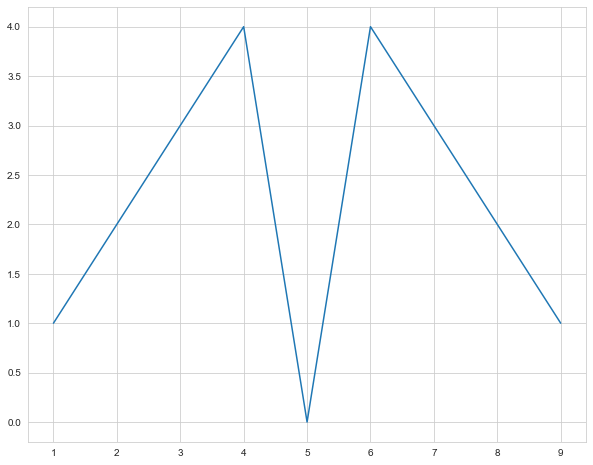

In [34]:
x = range(1,10)
y = [1,2,3,4,0,4,3,2,1]

plt.plot(x, y);

In [25]:
df.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


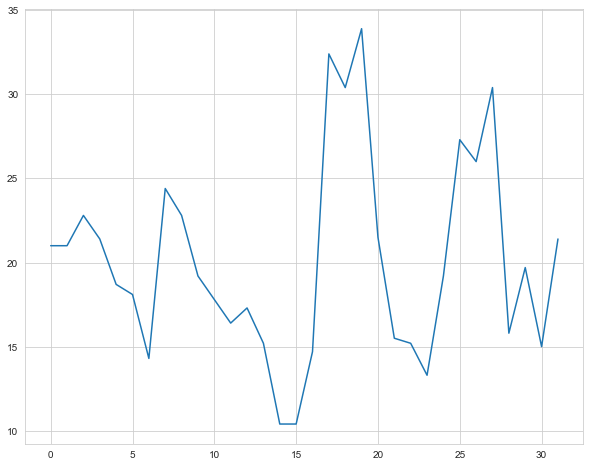

In [35]:
mpg = df['mpg']
mpg.plot();

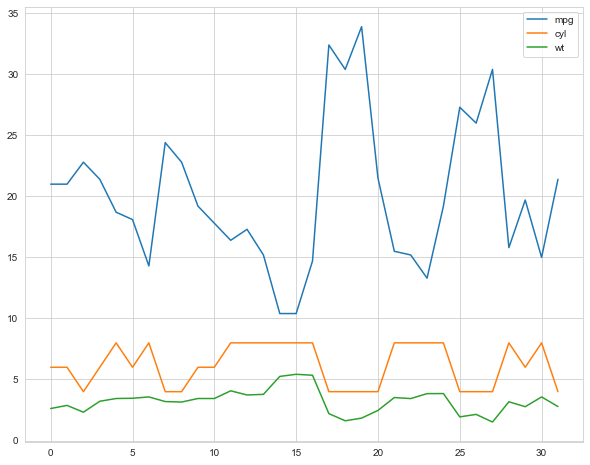

In [36]:
multiple = df[['mpg', 'cyl', 'wt']]
multiple.plot();

<BarContainer object of 9 artists>

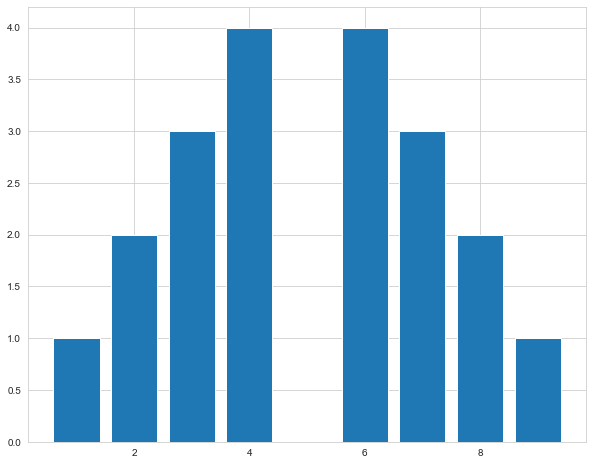

In [37]:
#bar chart
plt.bar(x, y);

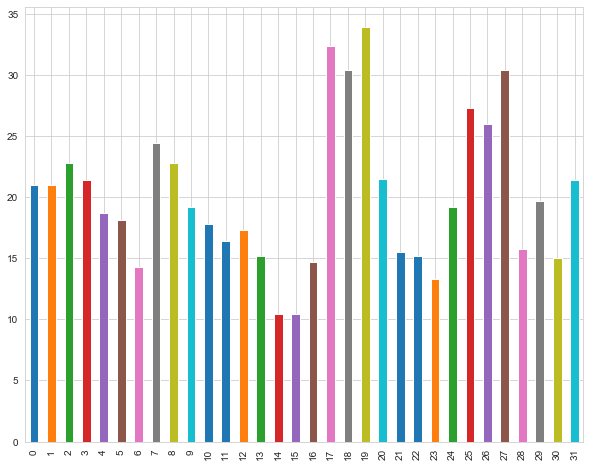

In [39]:
mpg.plot(kind='bar');

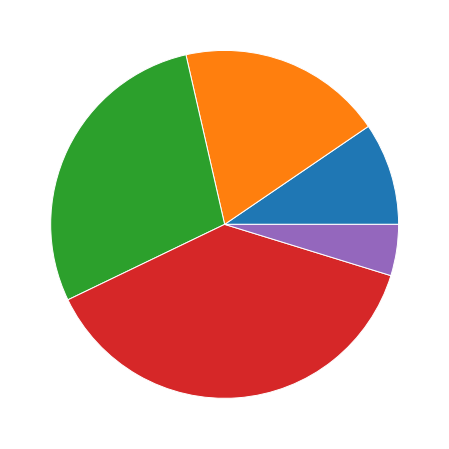

In [40]:
#pie chart
x = [1, 2, 3, 4, 0.5]
plt.pie(x);

In [41]:
#save plots
#plt.savefog('pie_chart.jpeg')

### Define plot elements

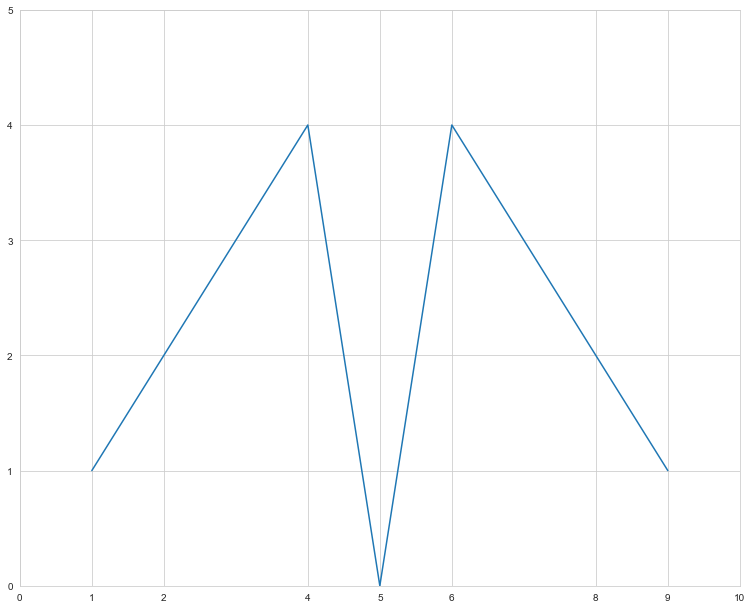

In [45]:
#Oject-Oriented Plotting
#Create blank fig, add axes, generate plot, specify parameters

x = range(1, 10)
y = [1, 2, 3, 4, 0, 4, 3, 2, 1]

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])

ax.set_xlim([1, 9])
ax.set_ylim([0, 5])

ax.set_xticks([0, 1, 2, 4, 5, 6, 8, 9, 10])
ax.set_yticks([0, 1, 2, 3, 4, 5])

ax.plot(x, y);

<Figure size 720x576 with 0 Axes>

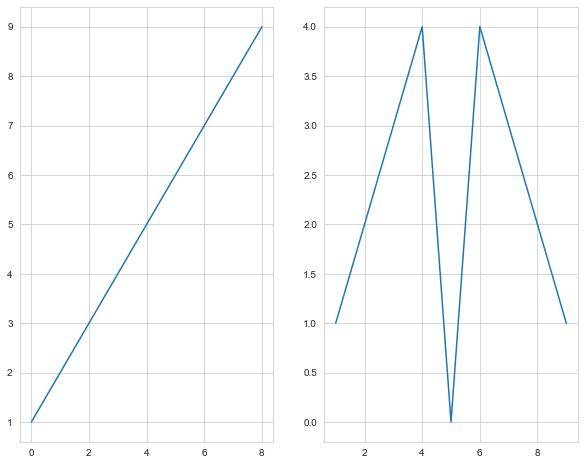

In [46]:
#subplots

fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(x);
ax2.plot(x, y);

### Format Plots

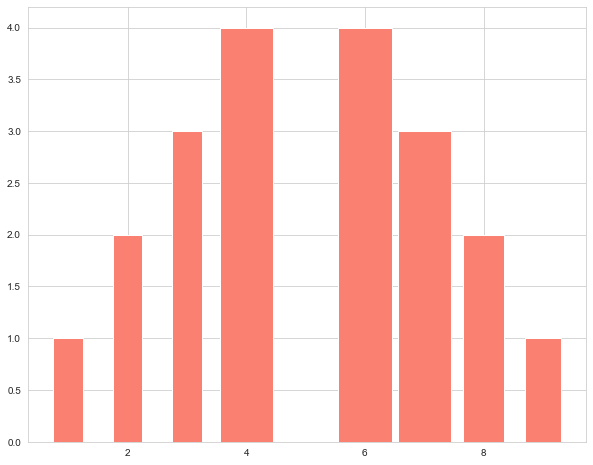

In [49]:
wide = [0.5, 0.5, 0.5, 0.9, 0.9, 0.9, 0.9, 0.7, 0.6]
color = ['salmon']
plt.bar(x, y, width=wide, color=color, align='center');

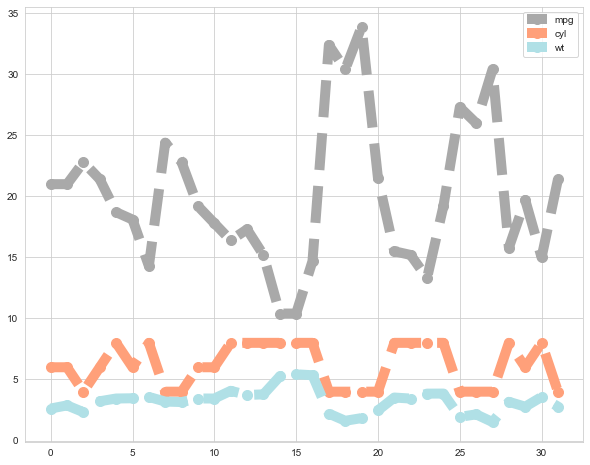

In [57]:
color = ['darkgrey', 'lightsalmon', 'powderblue']
multiple.plot(color=color, ls='--', lw=10, marker='o', ms=10);

### Label and Annotations

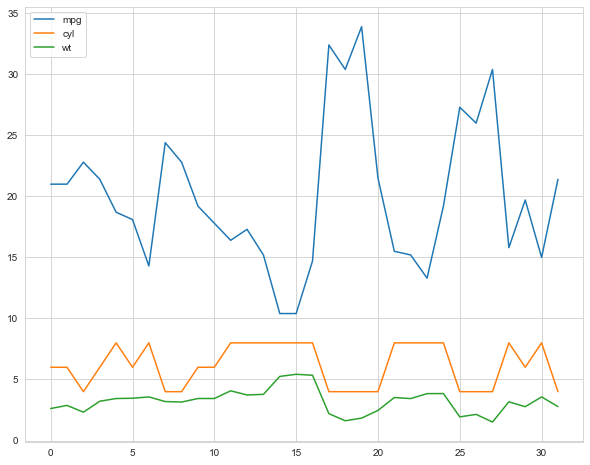

In [61]:
#add a legend
multiple.plot()
plt.legend(loc='upper left');

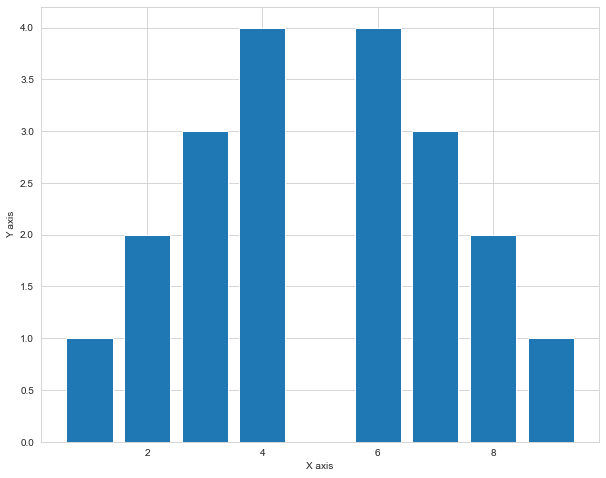

In [62]:
#axis labels
plt.bar(x, y)
plt.xlabel('X axis')
plt.ylabel('Y axis');

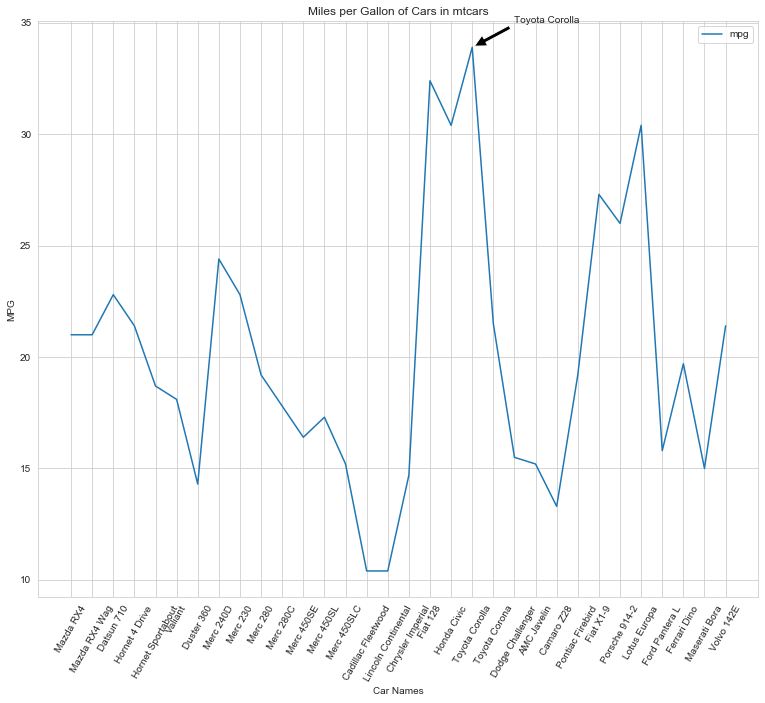

In [75]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
mpg = df.mpg
mpg.plot()

ax.set_xticks(range(32))

ax.set_xticklabels(df.car_names, rotation=60,
                   fontsize='medium')

ax.set_title('Miles per Gallon of Cars in mtcars')
ax.set_xlabel('Car Names')
ax.set_ylabel('MPG')
ax.legend(loc='best')

#annotation
m = mpg.max()

ax.annotate('Toyota Corolla', xy=(19, m), xytext=(21, 35),
           arrowprops=dict(facecolor='black', shrink=0.05));

### Time Series

<_io.TextIOWrapper name='Superstore-Sales.csv' mode='r' encoding='UTF-8'>


In [84]:
superstore = pd.read_csv('Superstore-Sales.csv',
                        index_col='Order Date',
                        parse_dates=True,
                        encoding = 'unicode_escape')
superstore.head()

,Row ID,Order ID,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
Order Date,,,,,,,,,,,,,,,,,,,,
2010-10-13,1,3,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
2012-10-01,49,293,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2012-10-01,50,293,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
2011-07-10,80,483,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
2010-08-28,85,515,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


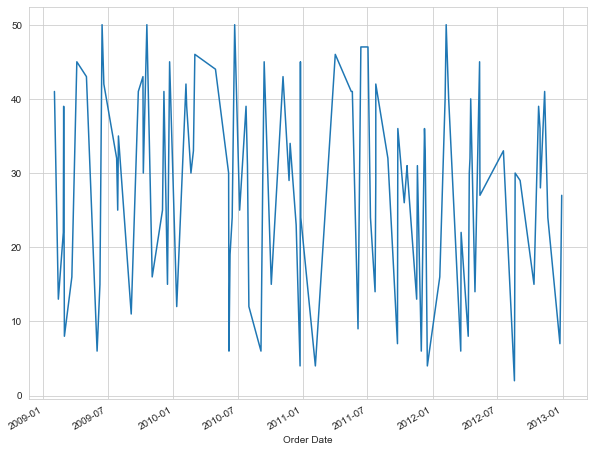

In [85]:
sample = superstore.sample(n=100, random_state=25, axis=0)

sample['Order Quantity'].plot()

### Histograms, Box Plots, Scatter Plots

In [86]:
from pandas.tools.plotting import scatter_matrix

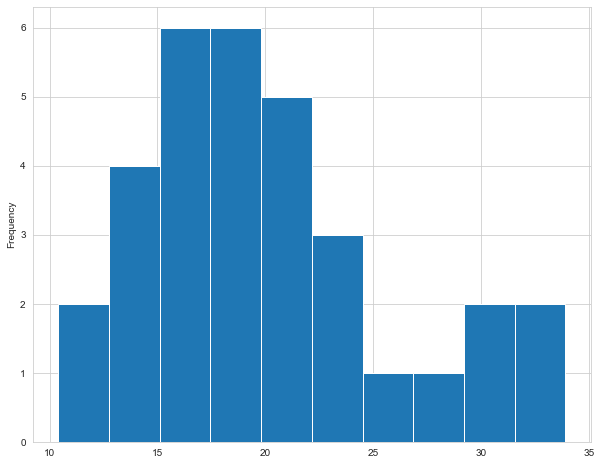

In [89]:
mpg.plot(kind='Hist');

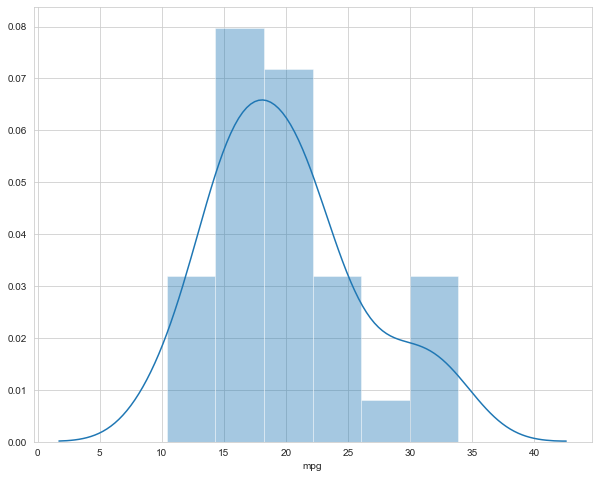

In [90]:
#with seaborn
sb.distplot(mpg);

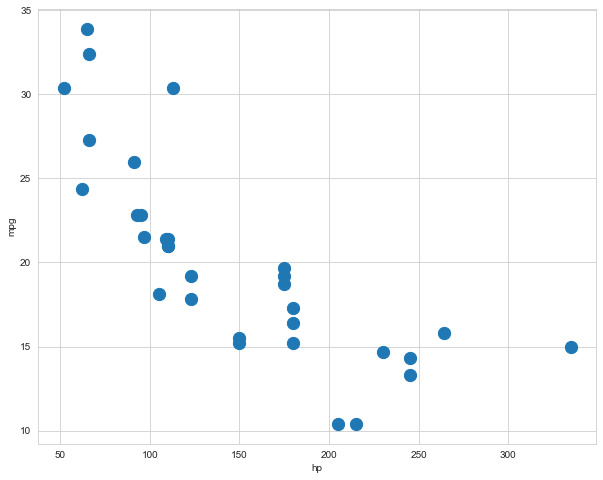

In [92]:
#scatter plot
df.plot(kind='scatter', x='hp', y='mpg', s=150);

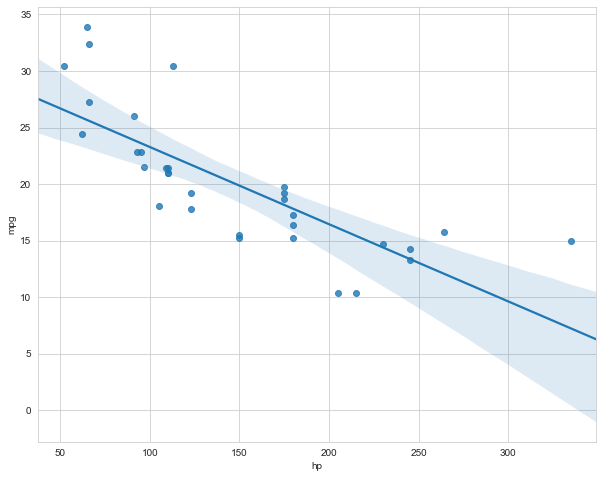

In [93]:
#seaborn
sb.regplot(x='hp', y='mpg', data=df, scatter=True);

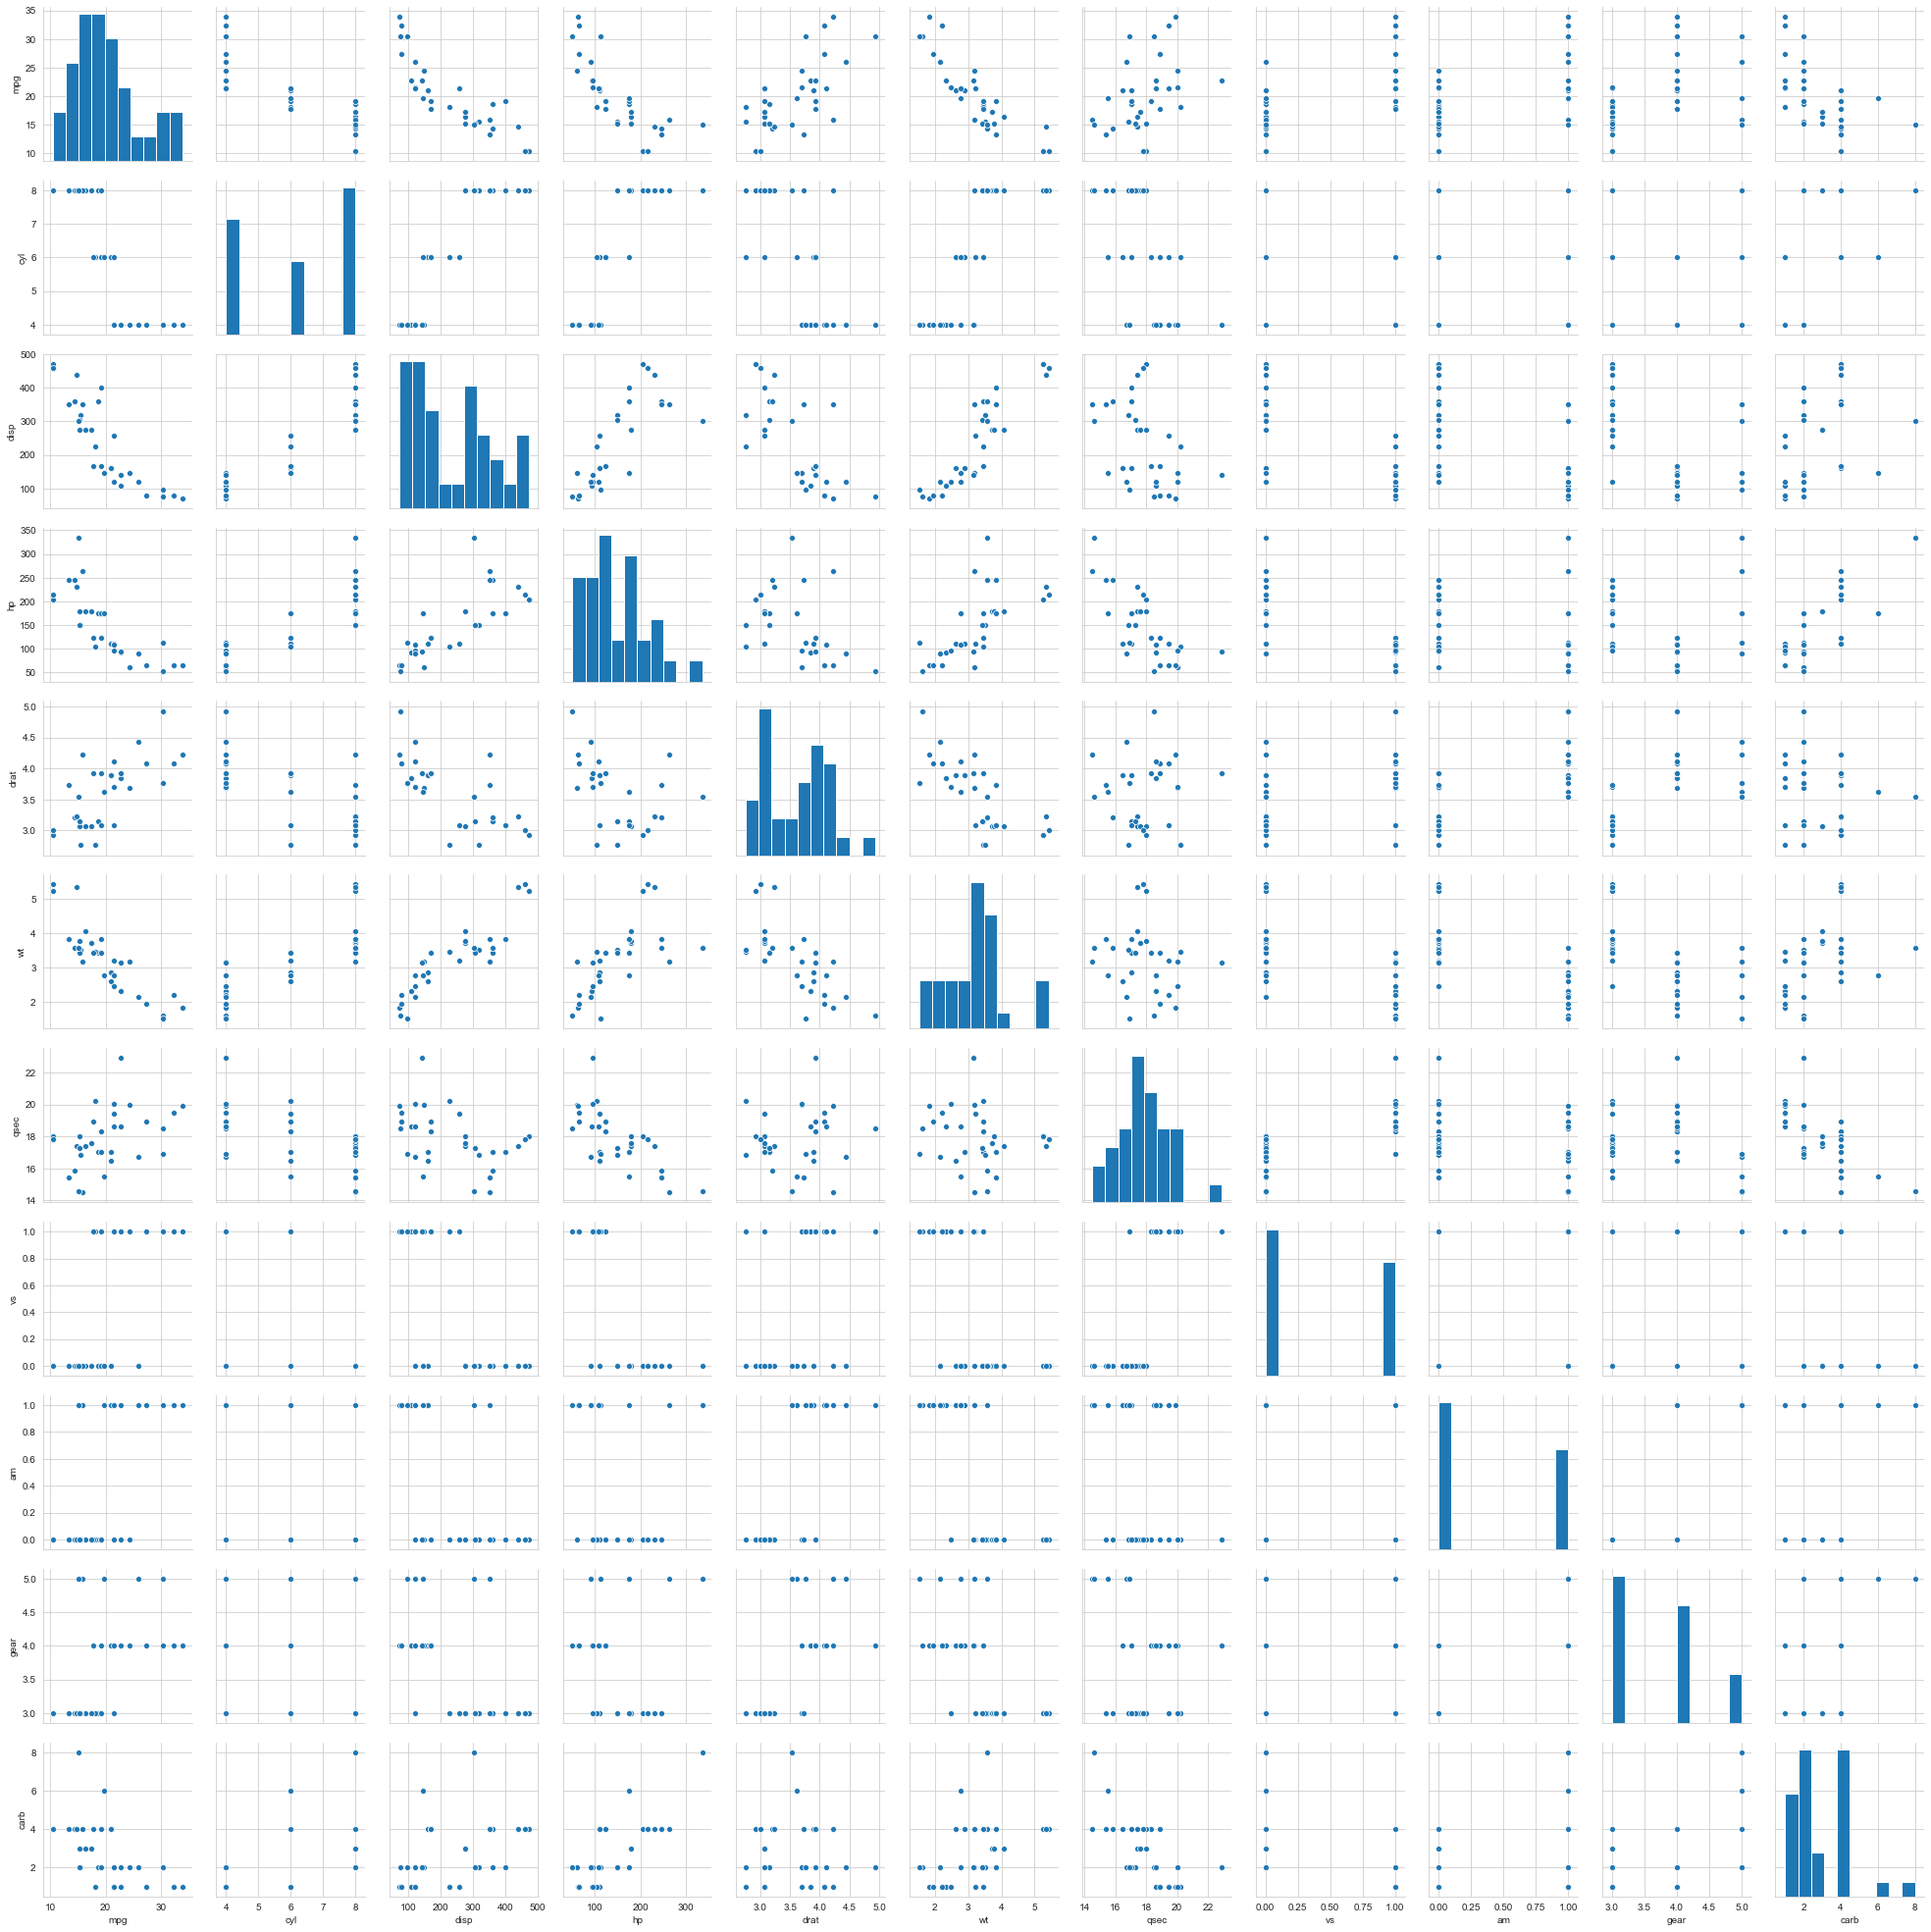

In [94]:
#scatter plot matrix
sb.pairplot(df)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning

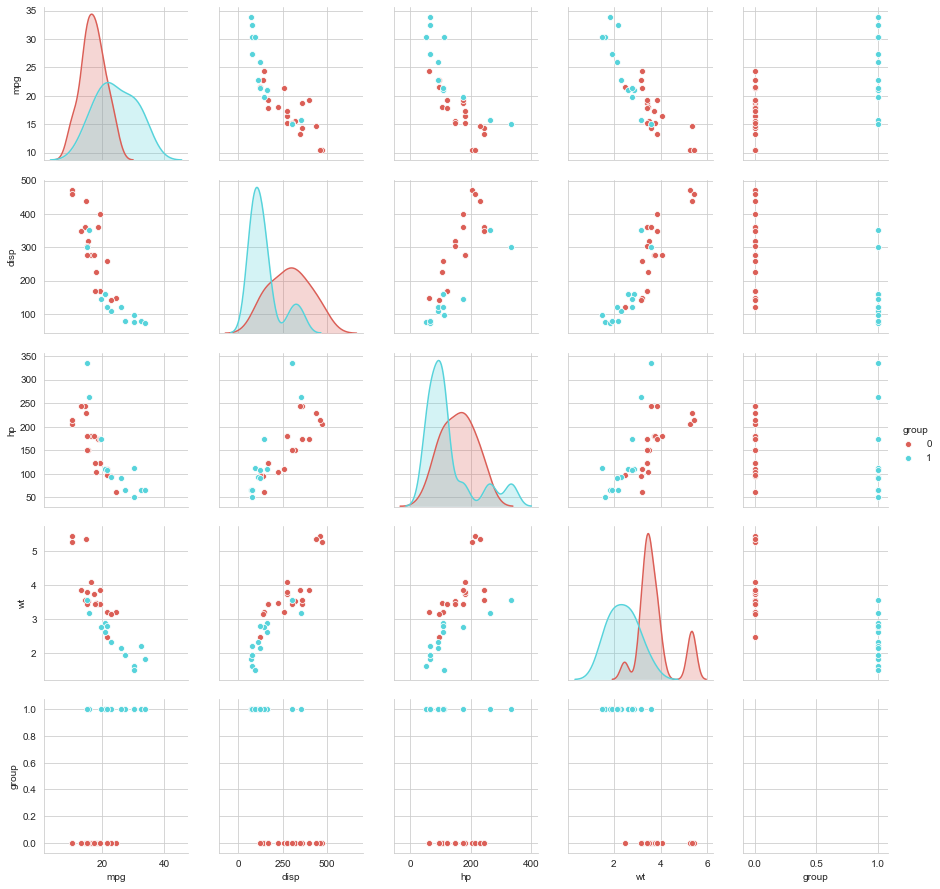

In [99]:
cars = pd.DataFrame((df.ix)[:, (1,3,4,6)].values, 
                    columns=['mpg', 'disp', 'hp', 'wt'])
targets = df.ix[:,9].values
target_names = [0, 1]

cars['group'] = pd.Series(targets, dtype='category')
sb.pairplot(cars, hue='group', palette='hls');

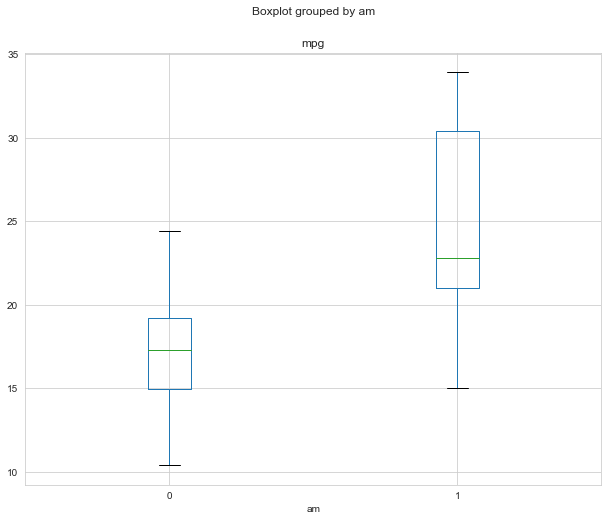

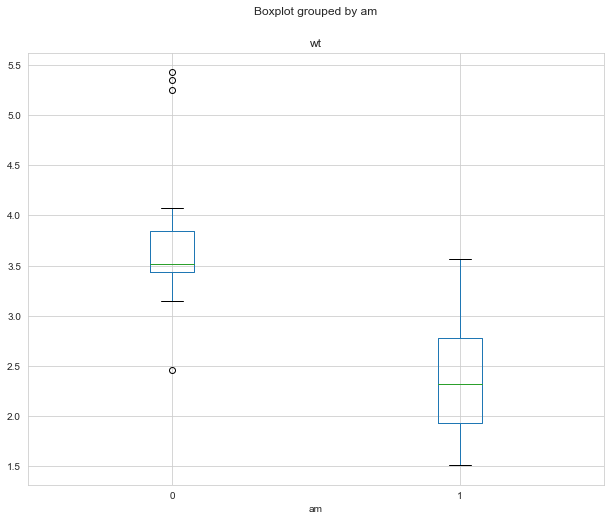

In [100]:
#box plots
df.boxplot(column='mpg', by='am')
df.boxplot(column='wt', by='am');

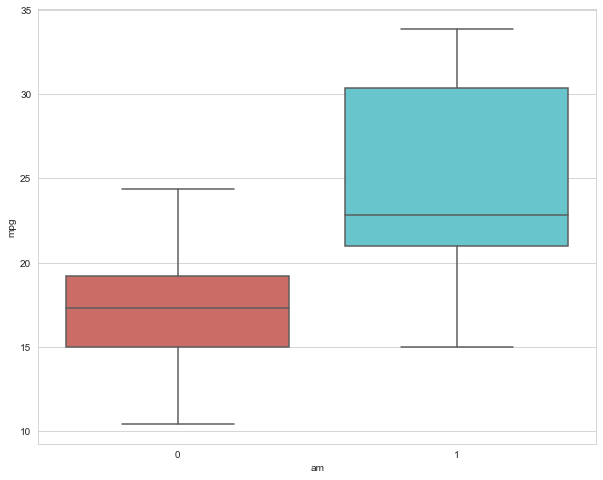

In [101]:
#seaborn
sb.boxplot(x='am', y='mpg', data=df, palette='hls');

## Basis Maths and Stats

In [3]:
#fast computation in numpy
from numpy.random import randn
np.set_printoptions(precision=2)

In [6]:
a = np.array([1, 2, 3, 4, 5, 6])
b = np.array([[10, 20, 30], [40, 50, 60]])
c = 36*np.random.randn(6)
d = np.arange(1,35)

In [7]:
#math operations
a * 10

array([10, 20, 30, 40, 50, 60])

In [8]:
c + a

array([  0.35,  48.87, -68.46,  72.28,  67.99,  28.83])

In [9]:
c * a

array([  -0.65,   93.74, -214.37,  273.1 ,  314.97,  137.01])

In [10]:
c / a

array([ -0.65,  23.44, -23.82,  17.07,  12.6 ,   3.81])

In [12]:
#multiplying matrices and basic linear algebra
aa = np.array([[2, 4, 6], [1, 3, 5], [10, 20, 30]])
bb = np.array([[0, 1 , 2], [3, 4, 5], [6, 7, 8]])

In [13]:
aa * bb

array([[  0,   4,  12],
       [  3,  12,  25],
       [ 60, 140, 240]])

In [14]:
np.dot(aa, bb)

array([[ 48,  60,  72],
       [ 39,  48,  57],
       [240, 300, 360]])

### Summary Statistics with pandas and scipy


In [15]:
import scipy
from scipy import stats

In [21]:
cars = pd.read_csv('mtcars.csv')
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [22]:
#sum method
cars.sum()

car_names    Mazda RX4Mazda RX4 WagDatsun 710Hornet 4 Drive...
mpg                                                      642.9
cyl                                                        198
disp                                                    7383.1
hp                                                        4694
drat                                                    115.09
wt                                                     102.952
qsec                                                    571.16
vs                                                          14
am                                                          13
gear                                                       118
carb                                                        90
dtype: object

In [23]:
cars.median()

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

In [24]:
cars.mean()

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [25]:
cars.max()

car_names    Volvo 142E
mpg                33.9
cyl                   8
disp                472
hp                  335
drat               4.93
wt                5.424
qsec               22.9
vs                    1
am                    1
gear                  5
carb                  8
dtype: object

In [26]:
cars.min()

car_names    AMC Javelin
mpg                 10.4
cyl                    4
disp                71.1
hp                    52
drat                2.76
wt                 1.513
qsec                14.5
vs                     0
am                     0
gear                   3
carb                   1
dtype: object

In [28]:
#summary stats to describe the varibale distribution
 cars.std()

mpg       6.026948
cyl       1.785922
disp    123.938694
hp       68.562868
drat      0.534679
wt        0.978457
qsec      1.786943
vs        0.504016
am        0.498991
gear      0.737804
carb      1.615200
dtype: float64

In [30]:
cars.var()

mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
vs          0.254032
am          0.248992
gear        0.544355
carb        2.608871
dtype: float64

In [34]:
cars.gear.value_counts()

3    15
4    12
5     5
Name: gear, dtype: int64

In [35]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [38]:
#summarise categorical data
carbs = cars.carb.value_counts()
carbs

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

In [39]:
cars_cat = cars[['cyl', 'vs', 'am', 'gear', 'carb']]
cars_cat

,cyl,vs,am,gear,carb
0,6,0,1,4,4
1,6,0,1,4,4
2,4,1,1,4,1
3,6,1,0,3,1
4,8,0,0,3,2
5,6,1,0,3,1
6,8,0,0,3,4
7,4,1,0,4,2
8,4,1,0,4,2
9,6,1,0,4,4


In [40]:
gg = cars_cat.groupby('gear')
gg.describe()

am                                               carb           ...   \
     count      mean       std  min  25%  50%  75%  max count      mean ...    
gear                                                                    ...    
3     15.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  15.0  2.666667 ...    
4     12.0  0.666667  0.492366  0.0  0.0  1.0  1.0  1.0  12.0  2.333333 ...    
5      5.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   5.0  4.400000 ...    

      cyl         vs                                               
      75%  max count      mean       std  min  25%  50%  75%  max  
gear                                                               
3     8.0  8.0  15.0  0.200000  0.414039  0.0  0.0  0.0  0.0  1.0  
4     6.0  6.0  12.0  0.833333  0.389249  0.0  1.0  1.0  1.0  1.0  
5     8.0  8.0   5.0  0.200000  0.447214  0.0  0.0  0.0  0.0  1.0  

[3 rows x 32 columns]

In [43]:
cars['group'] = pd.Series(cars.gear, dtype='category')
cars['group'].value_counts()                          

3    15
4    12
5     5
Name: group, dtype: int64

In [45]:
#creating cross tabs
pd.crosstab(cars['am'], cars['gear'])

gear,3,4,5
am,,,
0,15,4,0
1,0,8,5


### Parametric methods

In [47]:
#pearson correlation coefficient
import matplotlib.pyplot as plt 
import seaborn as sb
from pylab import rcParams
from scipy.stats.stats import pearsonr

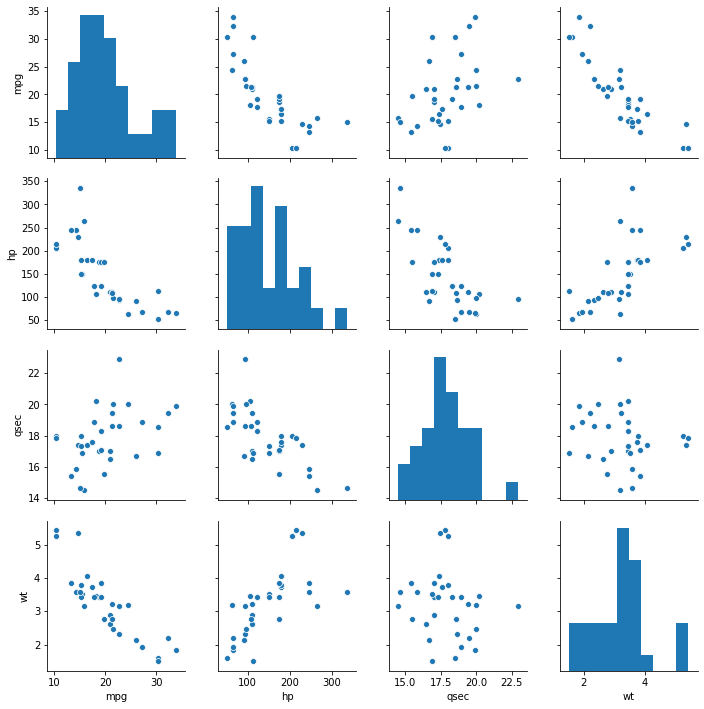

In [49]:
X = cars[['mpg', 'hp', 'qsec', 'wt']]
sb.pairplot(X)

In [52]:
mpg = cars['mpg']
hp = cars['hp']
qsec = cars['qsec']
wt = cars['wt']

pearsonr_coefficient, p_value = pearsonr(mpg, hp)
print('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))


PearsonR Correlation Coefficient -0.776


In [53]:
pearsonr_coefficient, p_value = pearsonr(mpg, qsec)
print('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient 0.419


In [54]:
pearsonr_coefficient, p_value = pearsonr(mpg, wt)
print('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient -0.868


In [55]:
#easy to calculate in pandas
corr = X.corr()
corr

,mpg,hp,qsec,wt
mpg,1.000000,-0.776168,0.418684,-0.867659
hp,-0.776168,1.000000,-0.708223,0.658748
qsec,0.418684,-0.708223,1.000000,-0.174716
wt,-0.867659,0.658748,-0.174716,1.000000


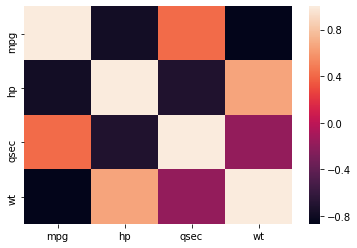

In [57]:
sb.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values);

### Nonparametric Methods for Correlation

In [58]:
## spearmans rank correlation
from scipy.stats import spearmanr

In [59]:
rcParams['figure.figsize'] = 14, 7
plt.style.use('seaborn-whitegrid')

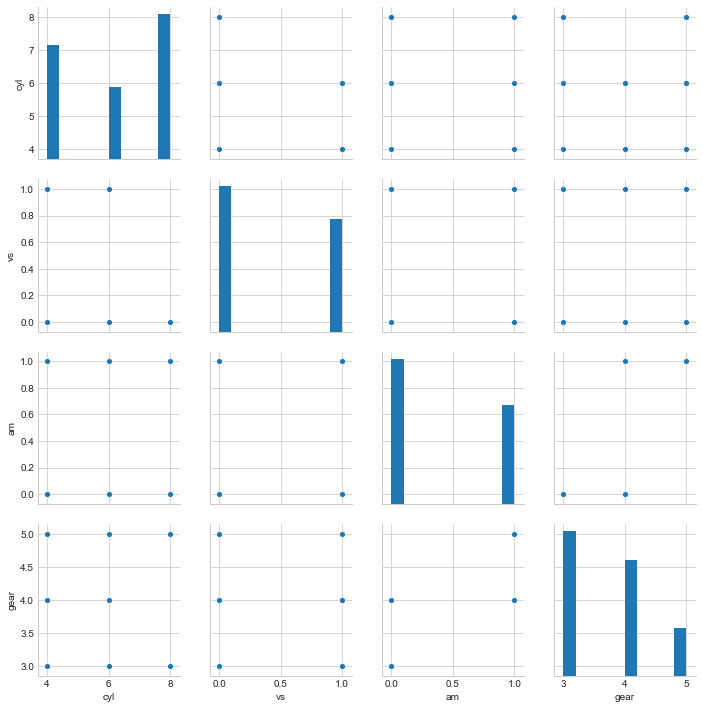

In [61]:
X = cars[['cyl', 'vs', 'am', 'gear']]
sb.pairplot(X)

In [63]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']

spearmnar_coeff, p_value = spearmanr(cyl, vs)
print('SpearmanR Correlation Coefficient %0.3f' % (spearmnar_coeff))

SpearmanR Correlation Coefficient -0.814


In [64]:
spearmnar_coeff, p_value = spearmanr(cyl, am)
print('SpearmanR Correlation Coefficient %0.3f' % (spearmnar_coeff))

SpearmanR Correlation Coefficient -0.522


In [65]:
spearmnar_coeff, p_value = spearmanr(cyl, gear)
print('SpearmanR Correlation Coefficient %0.3f' % (spearmnar_coeff))

SpearmanR Correlation Coefficient -0.564


In [67]:
# chi square test for independence
table = pd.crosstab(cyl, am)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-squar stat %0.3f p_value %0.3f' % (chi2, p))

Chi-squar stat 8.741 p_value 0.013


In [68]:
table = pd.crosstab(cyl, vs)
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-squar stat %0.3f p_value %0.3f' % (chi2, p))

Chi-squar stat 21.340 p_value 0.000


In [69]:
table = pd.crosstab(cyl, gear)
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-squar stat %0.3f p_value %0.3f' % (chi2, p))

Chi-squar stat 18.036 p_value 0.001


### Scale and Transform variables

In [70]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

rcParams['figure.figsize'] = 5, 4
plt.style.use('seaborn-whitegrid')

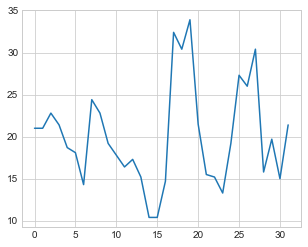

In [71]:
mpg = cars.mpg
plt.plot(mpg);

In [73]:
cars.mpg.describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

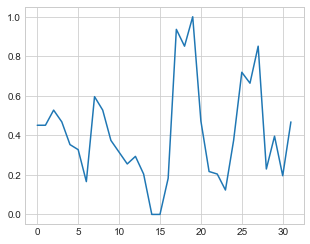

In [79]:
mpg_matrix = mpg.values.reshape(-1, 1)
scaled = preprocessing.MinMaxScaler()
scaled_mpg = scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg);

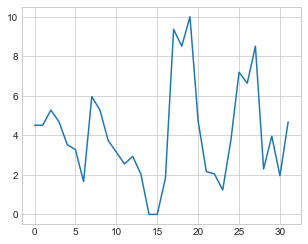

In [80]:
#can alter the range of scaling
scaled = preprocessing.MinMaxScaler(feature_range=(0, 10))
scaled_mpg = scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg);

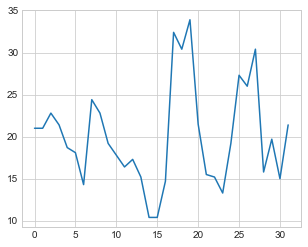

In [81]:
standardised_mpg = scale(mpg, axis=0, with_mean=False, with_std=False)
plt.plot(standardised_mpg);
#same variable

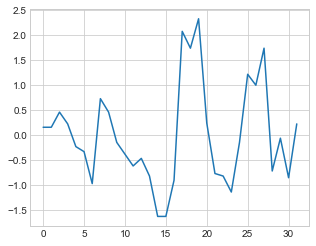

In [82]:
#set mean to zero and distribution to unit variance
standardised_mpg = scale(mpg)
plt.plot(standardised_mpg);
#now has normal distribution - standardised

## Intro to Machine Learning

### Dimensionality Reduction

In [2]:
#factor analysis - regression method. Factos = latent variables
#uncovers combination of features that contain most info on data
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import FactorAnalysis
from sklearn import datasets

In [9]:
iris = datasets.load_iris()

In [11]:
X = iris.data 
variable_names = iris.feature_names 

In [12]:
factor = FactorAnalysis().fit(X)

pd.DataFrame(factor.components_, columns=variable_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.707227,-0.153147,1.653151,0.701569
1,0.114676,0.159763,-0.045604,-0.014052
2,-0.000000,0.000000,0.000000,0.000000
3,-0.000000,0.000000,0.000000,-0.000000


### Singular Value Decomposition (SVD)

Linear algebra method that decomposes matrix into three resultant matrices

Reduces information redundancy and noise

Most commonly used for Principal Component Analysis (PCA)

PCA = Unsupervised ML algorithm that converts a set of possibly correlated varibales to a set of linearly uncorrelated varibales called principle components. 

Used for:
- Fraud detection
- Spam detection
- Image recognition 
- Speech recognition

Use the resultant factor and components as input variables for further ML algorithms.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')


from sklearn import decomposition
from sklearn.decomposition import PCA

In [15]:
#use iris dataset again
#instantiate PCA method
pca = decomposition.PCA()
iris_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [18]:
pca.explained_variance_ratio_.sum()

1.0

The variance ratio tells you how much info is compressed into the first few components.

Need to figure out what components to keep! (Should always retain at least 70% of the dataset's original information)

The sum of 1 (cummulative variance) tells us that 100% of the information about the dataset is captured in the four features. But some information is tied with noise and redundancy. We simply want the PRINCIPLE COMPONENTS. 

We can see from the variance ratio that 92.4% of the data informations is captured by this feature. So by taking the first two features, we only lose 2.3% of the information.

In [22]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361590,-0.082269,0.856572,0.358844
1,0.656540,0.729712,-0.175767,-0.074706
2,-0.580997,0.596418,0.072524,0.549061
3,0.317255,-0.324094,-0.479719,0.751121


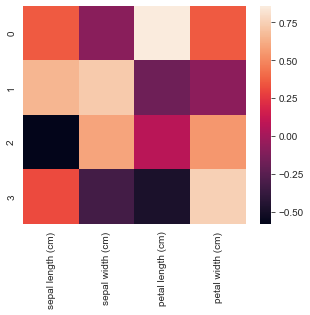

In [23]:
#see how datasets variables correlate with principle components with heatmap
sb.heatmap(comps);

Can look to see how Factor 0 and 1 (The principle components) correlate to the other factors. E.g. Factor 0 (sepal length) is strongly positively correlated with petal length (factor 2).

### Outlier Analysis

Three main types of outliers:
- Point outliers - anomalous obeservations with respect to majority of oberservations.
- Contextual outliers - observations considered anomalous in a specific context.
- Collective outliers - a collection of anomalous observations

In [24]:
# Univariate method: Tukey boxplots
# Any observation 1.5 times outside the interquartile range is considered an outlier
# Different this time, will read iris in as csv

df = pd.read_csv('iris.csv', sep=',')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

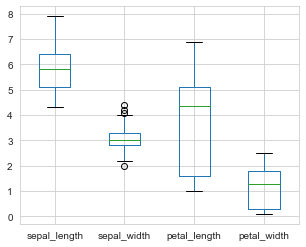

In [30]:
df.boxplot(return_type='dict')
plt.plot;

In [31]:
sepal_width = X[:,1]
iris_outliers = (sepal_width > 4)
df[iris_outliers]
# circles represent outliers

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [32]:
iris_outliers = (sepal_width < 2.05)
df[iris_outliers]

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,versicolor


In [33]:
X_df = pd.DataFrame(X)
X_df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Calculate the limits for outliers

IQR = 75% - 25%
For sepal_width (column 1): IQR = 3.3 - 2.8 = 0.5

1.5 x IQR = 0.75

Low limit = 2.8 - 0.75 = 2.05
Upper limit = 3.3 + 0.75 = 4.05

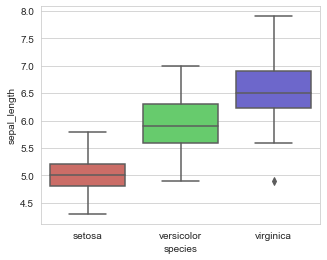

In [37]:
# Multivariate analysis - Box plots
sb.boxplot(x='species', y='sepal_length', data=df, palette='hls');

This produces one outlier in the virginica boxplot

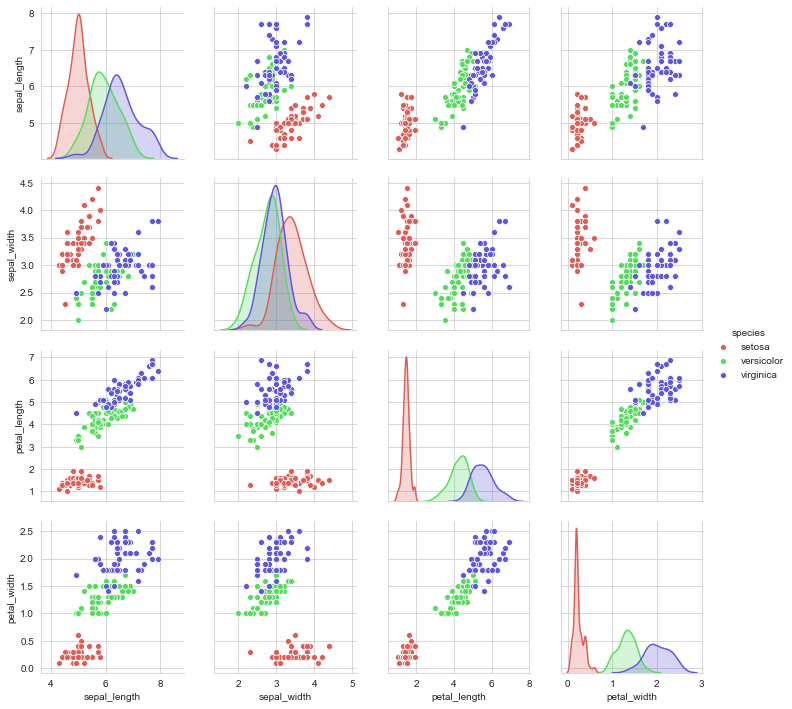

In [39]:
# Multivariate analysis - scatterplot matrix
sb.pairplot(df, hue='species', palette='hls');

### DBSCAN 

Unsupervised method for outlier detection.

Can be used to identify collective outliers.

NB: Outliers should make up less that 5% of total observations - adjust model parameters accordingly

MODEL PARAMETERS:
eps: maximum distance between two samples for them to be clustered in the same neighbourhood (standard = 0.1).

min_samples: the minimum number of samples in a neighbourhood for a data point to qualify as a core point i.e. not an outlier (start with very low sample size).

In [40]:
from sklearn.cluster import DBSCAN 
from collections import Counter

In [41]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
model = DBSCAN(eps=0.8, min_samples=19).fit(X)

In [48]:
outliers_df = pd.DataFrame(X)

#check outliers are less than 5%

print(Counter(model.labels_))

print(outliers_df[model.labels_ == -1])

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


6 observations out of 150 are outliers: 4%

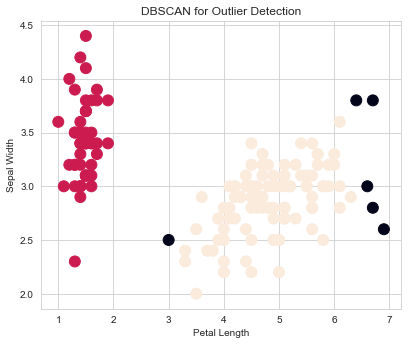

In [52]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
colors = model.labels_

ax.scatter(X[:, 2], X[:,1], c=colors, s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for Outlier Detection');

## Cluster Analysis

### K-Means Clustering

Unsupervised algorithm for quickly predicting grouping from within an unlabeled dataset.

Predictions are based on:
- Number of cluster centers present (k)
- Nearest mean values

Always need to scale your variables!

Tip: Look at scatterplot or data tbale to estimate number of cluster centers to set for the k parameter in the model

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
from sklearn import datasets
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [6]:
iris = datasets.load_iris()

In [7]:
X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:10,]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

In [8]:
#instantiate k means object
clustering = KMeans(n_clusters=3, random_state=5)

clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [10]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

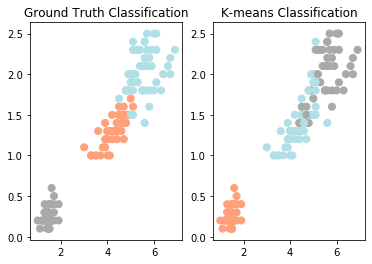

In [11]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('K-means Classification');


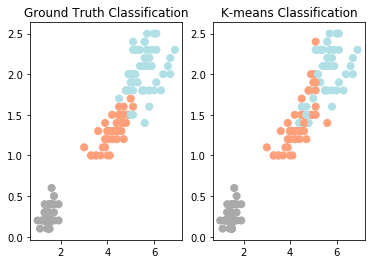

In [13]:
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-means Classification');

In [14]:
#Evalute the model quantitatively
print(classification_report(y, relabel))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.74      0.78      0.76        50
          2       0.77      0.72      0.74        50

avg / total       0.83      0.83      0.83       150



Precision = measure of model's relevancy
Recall = measure of model's completeness

Want a high value of both!

Really got at predicting label 0 (100 %)

### Hierarchical Clustering

Unsupervised ML algorithm that predicts subgroups within data by finding distance between each data point and nearest neighbours.

Model paramters

Distance metrics:
- Euclidian
- Manhattan
- Cosine

Linkage Parameters:
- Ward
- Complete
- Average

Use trial and error on all combinations!

In [15]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster, cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
import seaborn as sb

from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [16]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
plt.style.use('seaborn-whitegrid')

<Figure size 720x216 with 0 Axes>

In [33]:
cars = pd.read_csv('mtcars.csv')
cars.rename(columns={'Unnamed: 0':'car_names'}, inplace=True)

X = cars.iloc[:,[1,3,4,6]].values
y = cars.iloc[:, (9)].values

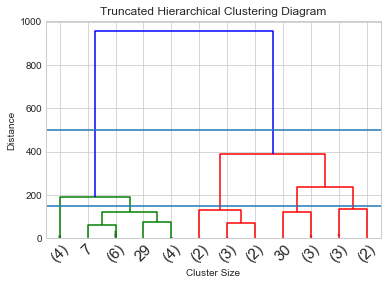

In [31]:
# generate dendrograms
Z = linkage(X, 'ward')
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)
plt.title('Truncated Hierarchical Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150);

From the line at 500, we can choose two clusters to predict if transmission is 1 or 0 

In [34]:
# Generate hierarchical clusters
k = 2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [35]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.4375

In [36]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [38]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.71875

### k-Nearest Neighbour Classification

K-NN is a supervised classifier that memorises observations from within a labeled test set to predict classification for new, unlabeled observations.

Makes predictions based on how similar training observations are to new incoming observaitons.

Assumptions:

Data has little noise
Data is labelled
Only contains relevant features
Has distinguishable subgroups

Don't use on large datasets!

In [47]:
import urllib
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn import metrics

In [40]:
rcParams['figure.figsize'] = 7, 4

In [41]:
#try to predict if a car is manual or automatic transmission from few features
#So am variable is target

X_prime = cars.iloc[:, [1,3,4,6]].values
y = cars.iloc[:,9].values

In [44]:
X = preprocessing.scale(X_prime)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=17)

In [46]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [48]:
y_expect = y_test
y_pred = clf.predict(X_test)

print(metrics.classification_report(y_expect, y_pred))

             precision    recall  f1-score   support

          0       0.71      1.00      0.83         5
          1       1.00      0.67      0.80         6

avg / total       0.87      0.82      0.82        11



Can see from recall score - of all points labelled 1, only 67% were truly relevant.

High precision and low recall means that there are few results returned, but many of the label predictions were correct.

### Network Analysis

Network - A body of connected data that's evalusated during graph analysis

Graph - Data vis schematic that depicts the data

Nodes -  Vertices around which a graph is formed

Edges - Lines that connect vertices within a graph

Directed graph -  A graph where there is a direction assigned to each edge

Undirected graph - A graph where all edges are bidirectional

Graph size -  Number of edges in a graph

Graph order-  The number of vertices in a graph

Degree - Number of edges connected to a vertex, with loops counted twice

Types of Graph Generators:
- Graph drawing algorithms
- Network analysis algorithms
- Algorithmic routing for graphs
- Graph search algorithms
- Subgraph algorithms

In [49]:
! pip install networkx

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
import networkx as nx

rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

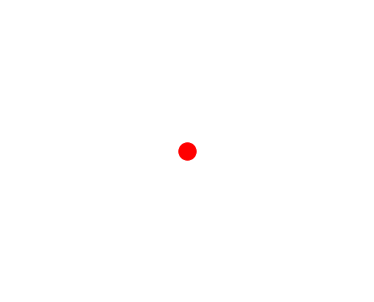

In [54]:
#empty graph object
G = nx.Graph()
G.add_node(1)
nx.draw(G)

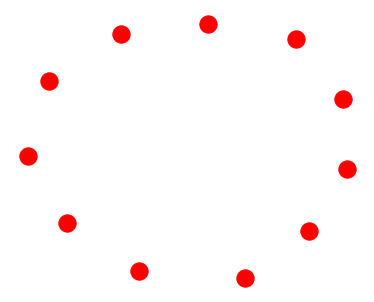

In [56]:
G.add_nodes_from([2,3,4,5,6,8,9,12,15,16])
nx.draw(G)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


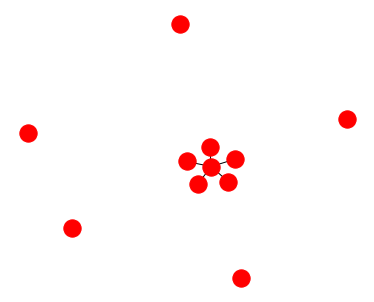

In [57]:
G.add_edges_from([(2,4), (2,6), (2,8), (2,12), (2,16)])
nx.draw(G)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


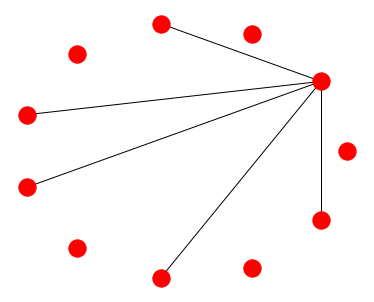

In [58]:
nx.draw_circular(G)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


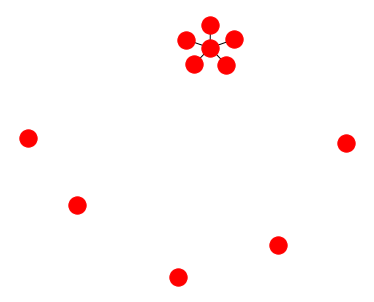

In [60]:
nx.draw_spring(G)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


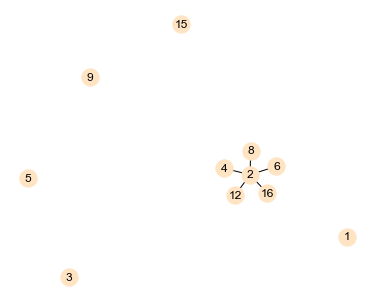

In [61]:
nx.draw_spring(G, node_color='bisque', with_labels=True)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


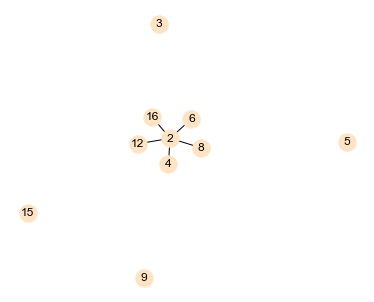

In [62]:
G.remove_node(1)
nx.draw_spring(G, node_color='bisque', with_labels=True)

In [65]:
#identify graph properties
summary = nx.info(G)
print(summary)

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 5
Average degree:   1.0000


In [66]:
#node: num of edges
nx.degree(G)

DegreeView({2: 5, 3: 0, 4: 1, 5: 0, 6: 1, 8: 1, 9: 0, 12: 1, 15: 0, 16: 1})

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


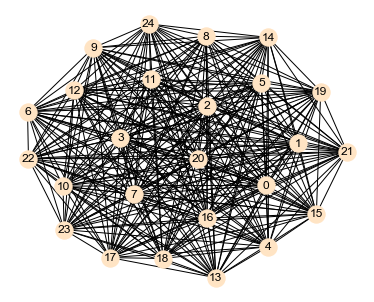

In [67]:
G = nx.complete_graph(25)
nx.draw(G, node_color='bisque', with_labels=True)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size)

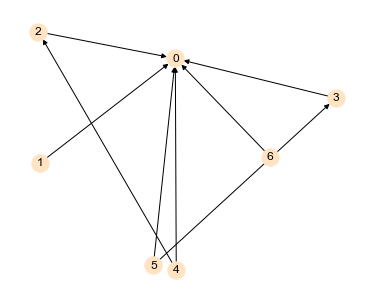

In [68]:
G = nx.gnc_graph(7, seed=25)
nx.draw(G, node_color='bisque', with_labels=True)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size)

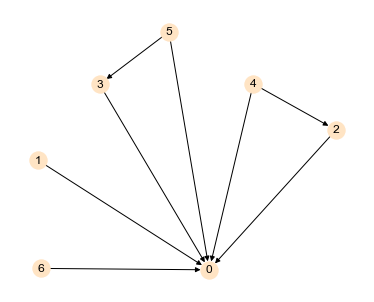

In [69]:
ego_G = nx.ego_graph(G, 3, 5)
nx.draw(G, node_color='bisque', with_labels=True)

In [71]:
# Simulate a social network

DG = nx.gn_graph(7, seed=25)

for line in nx.generate_edgelist(DG, data=False): print(line)

1 0
2 0
3 2
4 3
5 0
6 4


In [73]:
DG.node[0]['name'] = 'Alice'
print(DG.node[0])

{'name': 'Alice'}


In [74]:
DG.node[1]['name'] = 'Bob'
DG.node[2]['name'] = 'Claire'
DG.node[3]['name'] = 'Dennis'
DG.node[4]['name'] = 'Esther'
DG.node[5]['name'] = 'Frank'
DG.node[6]['name'] = 'George'

In [82]:
#another way to add an attribute to a node
DG.add_nodes_from([(0,{'age':25}),
                   (1,{'age':31}),
                   (2,{'age':18}),
                   (3,{'age':47}),
                   (4,{'age':22}),
                   (5,{'age':23}),
                   (6,{'age':50})])
print(DG.node[0])

{'name': 'Alice', 'age': 25}


In [83]:
DG.node[0]['gender'] = 'f'
DG.node[1]['gender'] = 'm'
DG.node[2]['gender'] = 'f'
DG.node[3]['gender'] = 'm'
DG.node[4]['gender'] = 'f'
DG.node[5]['gender'] = 'm'
DG.node[6]['gender'] = 'm'

print(DG.node[0])

{'name': 'Alice', 'age': 25, 'gender': 'f'}


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size)

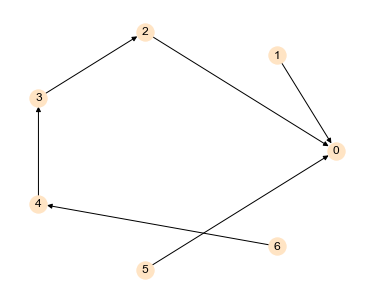

In [84]:
nx.draw_circular(DG, node_color='bisque', with_labels=True)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size)

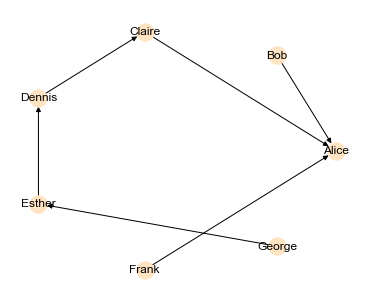

In [86]:
labeldict = {0: 'Alice', 1: 'Bob', 2: 'Claire', 3: 'Dennis', 4: 'Esther', 5: 'Frank', 6: 'George'}
nx.draw_circular(DG, node_color='bisque', with_labels=True, labels=labeldict)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


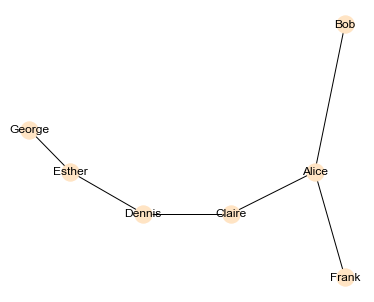

In [89]:
#change to undirected
G = DG.to_undirected()
nx.draw_spectral(G, labels=labeldict, node_color='bisque', with_labels=True)

This hides that alice is the most important node!

NETWORK ANALYSIS METRICS

Degree - Describes nodes connectedness

Successors - A successor node is a node that could serve as a backup and potentially replace an influential node in the netowrk. The function is to preserve the flow of inluence throughout the network in the case where an important node is removed

Neigbours - Adjacent nodes in a network

In [91]:
print(nx.info(DG))

Name: 
Type: DiGraph
Number of nodes: 7
Number of edges: 6
Average in degree:   0.8571
Average out degree:   0.8571


In [92]:
#node: degree
DG.degree()

DiDegreeView({0: 3, 1: 1, 2: 2, 3: 2, 4: 2, 5: 1, 6: 1})

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size)

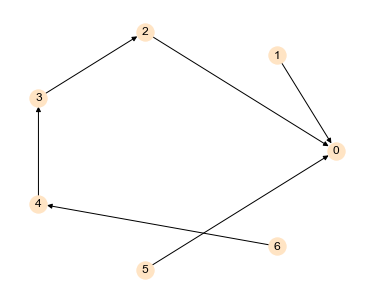

In [95]:
nx.draw_circular(DG, node_color='bisque', with_labels=True)

## Algorithmic Learning

### Linear Regression

Statistical ML method used to quantify and predict based on relationships between numerical variables

Simple linear regression - one predictor (y = mx + c)

Mulitple linear regression - multiple predictors (y = m1a + m2b + m3c + d)

ASSUMPTIONS
- No outliers
- Linear relationship between predictors and predictant
- All predictors are independent of each other
- Residuals (aka prediction errors) are normally distributed

In [105]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [106]:
df = pd.read_csv('enrollment_forecast.csv')
df.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


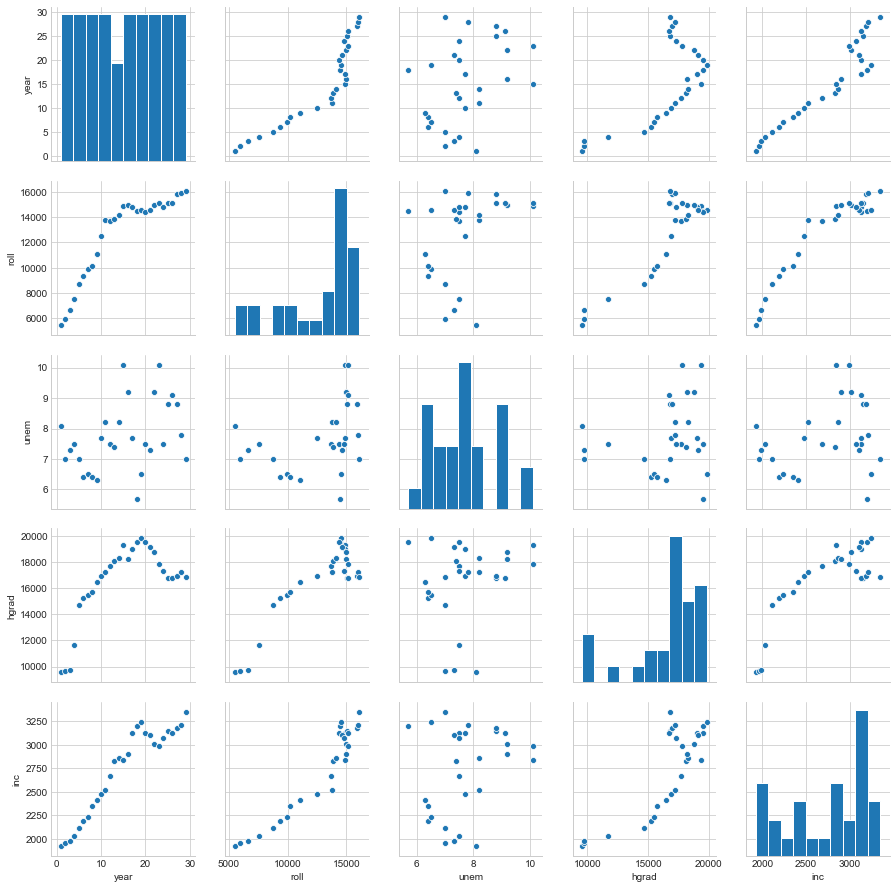

In [107]:
sb.pairplot(df)

In [108]:
df.corr()

,year,roll,unem,hgrad,inc
year,1.000000,0.900934,0.378305,0.670300,0.944287
roll,0.900934,1.000000,0.391344,0.890294,0.949876
unem,0.378305,0.391344,1.000000,0.177376,0.282310
hgrad,0.670300,0.890294,0.177376,1.000000,0.820089
inc,0.944287,0.949876,0.282310,0.820089,1.000000


In [116]:
df2 = df[['unem', 'hgrad']]
target = df['roll']

In [117]:
#scale
X, y = scale(df2), target

In [118]:
#check for missing values
m = X==np.NAN
X[m==True]

array([], dtype=float64)

In [119]:
#instantiate LR object
LinReg = LinearRegression(normalize=True)

LinReg.fit(X,y)

LinReg.score(X,y)

0.8488812666133723

Model has performed quite well, could be better (this is the multiple R^2 value)

### Logistic Regression

ML method used to predict the value of a numeric categorical variable based on relationship with predictor varibales.

ASSUMPTIONS
- Data free of missing values
- Predictant variable is binary/ordinal
- Predictors independent of each other
- At least 50 observations per predictor variable

In [120]:
import scipy
from scipy.stats import spearmanr

from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [121]:
cars = pd.read_csv('mtcars.csv')
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [123]:
# predict automatic or manual transmission
cars_data = cars[['drat', 'carb']]
y = cars['am']

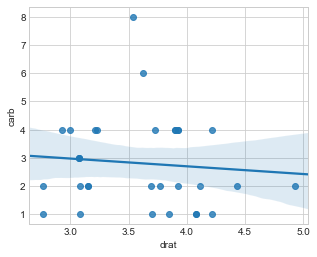

In [125]:
#check assumptions - independence/missing values
sb.regplot(x='drat', y='carb', data=cars, scatter=True);

Can see they are ordinal values

In [127]:
drat = cars['drat']
carb = cars['carb']

spearmanr_coefficient, p_value = spearmanr(drat, carb)
spearmanr_coefficient, p_value

(-0.1252229399201802, 0.49468240297065824)

-0.125 is very low correlation. Good!

In [128]:
cars.isnull().sum()

Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64

No missing values

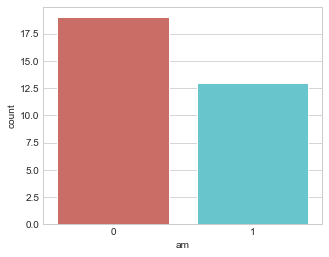

In [129]:
#check target is ordinal

sb.countplot(x='am', data=cars, palette='hls');

In [130]:
#check data size, is it more than 50
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
Unnamed: 0    32 non-null object
mpg           32 non-null float64
cyl           32 non-null int64
disp          32 non-null float64
hp            32 non-null int64
drat          32 non-null float64
wt            32 non-null float64
qsec          32 non-null float64
vs            32 non-null int64
am            32 non-null int64
gear          32 non-null int64
carb          32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


Its a small dataset, got to take that into mind

In [131]:
X = scale(cars_data)
LogReg = LogisticRegression()

LogReg.fit(X, y)
print(LogReg.score(X, y))

0.8125


In [132]:
y_pred = LogReg.predict(X)
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.79      0.83        19
          1       0.73      0.85      0.79        13

avg / total       0.82      0.81      0.81        32



### Naive Bayes Classifiers

ML method used to predict likelihood that an event will occur. Based on conditional probabilty:

$$P(B|A) = P(A and B)/P(A)$$

Three types of Naive Bayes Models:

- Multinomial - good for when features describe discrete frequency counts (e.g. word counts)
- Bernoulli - good for making predicitons from binary features
- Gaussian - good for making predictions from normall distributed features

Assumptions:

- Predictors are independent 
- A priori assumption - past conditions hold true
- All regression models maintain an a priori assumption as well

In [4]:
#predict spam mail with Naive Bayes

import numpy as np
import pandas as pd

import urllib.request

import sklearn
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [6]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
raw_data = urllib.request.urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=',')
dataset[0]

array([  0.   ,   0.64 ,   0.64 ,   0.   ,   0.32 ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.64 ,   0.   ,   0.   ,
         0.   ,   0.32 ,   0.   ,   1.29 ,   1.93 ,   0.   ,   0.96 ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.778,   0.   ,   0.   ,   3.756,  61.   ,
       278.   ,   1.   ])

In [7]:
X = dataset[:,0:48]
y = dataset[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [9]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)

y_expect = y_test
y_pred = BernNB.predict(X_test)
accuracy_score(y_expect, y_pred)

0.8558262014483212

In [10]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)

y_expect = y_test
y_pred = MultiNB.predict(X_test)
accuracy_score(y_expect, y_pred)

0.8736010533245556

In [16]:
Gau = GaussianNB()
Gau.fit(X_train, y_train)

y_expect = y_test
y_pred = Gau.predict(X_test)
accuracy_score(y_expect, y_pred)

0.8130348913759052

Multinomial best score so far. See if we can improve Bernoulli

In [17]:
BernNB = BernoulliNB(binarize=0.1)
BernNB.fit(X_train, y_train)

y_expect = y_test
y_pred = BernNB.predict(X_test)
accuracy_score(y_expect, y_pred)

0.8953258722843976

## Plotly

Cufflinks binds ploty to pandas objects

To generate plots from NumPy objects, need to use the following Plotly attributes

- Traces: describe a single varibale of data in a graph
- Layouts: elements that set the layout of your plot

### Basic Charts

In [18]:
! pip install Plotly

     |████████████████████████████████| 41.5MB 922kB/s  eta 0:00:01    |███████▊                        | 10.1MB 2.6MB/s eta 0:00:13     |█████████████▎                  | 17.2MB 15.4MB/s eta 0:00:02
  Stored in directory: /Users/timothyflack/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [19]:
! pip install cufflinks

     |████████████████████████████████| 81kB 2.5MB/s eta 0:00:01
  Stored in directory: /Users/timothyflack/Library/Caches/pip/wheels/8d/5a/6f/c97d47dc901071611809eb61aaa477d50a60692dc764dca622
Successfully built cufflinks


In [21]:
import numpy as np
import pandas as pd
import cufflinks as cf
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go

In [24]:
tls.set_credentials_file(username='TFlack08', api_key='KsYZsvCLMEKe9VVvTTvW')

In [25]:
#line chart
a = np.linspace(0, 36, 36)
b = np.random.uniform(0.0, 1.0, 36)

trace = go.Scatter(x=a, y=b)
data = [trace]

py.iplot(data, filename='basic-line-chart')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~TFlack08/0 or inside your plot.ly account where it is named 'basic-line-chart'


In [27]:
x = [1,2,3,4,5,6,7,8,9]
y = [1,2,3,4,0,4,3,2,1]
z = [10,9,8,7,6,5,4,3,2,1]

trace0 = go.Scatter(x=x, y=y, name='List Object', line = dict(width=5))
trace1 = go.Scatter(x=x, y=z, name='List Object', line = dict(width=10))

data = [trace0, trace1]

layout = dict(title='Double Line Chart', xaxis=dict(title='x-axis'), yaxis=dict(title='y-axis'))
fig = dict(data=data, layout=layout)

py.iplot(fig, filname='styled-line-plot')

In [28]:
#line chart from pandas
cars = pd.read_csv('mtcars.csv')
df = cars[['cyl', 'wt', 'mpg']]

layout = dict(title='Chart From Pandas DF', xaxis=dict(title='x-axis'), yaxis=dict(title='y-axis'))

df.iplot(filename='cf-simple-line-chart', layout=layout)

In [30]:
#bar chart
color_theme = dict(color=['red', 'black', 'red', 'black', 'red', 'black', 'red', 'black', 'red'])

data = [go.Bar(x=[1,2,3,4,5,6,7,8,9,10],y=[1,2,3,4,0.5,4,3,2,1], marker=color_theme)]
layout = dict(title='Simple Bar Chart',
             xaxis=dict(title='x-axis'),
             yaxis=dict(title='y-axis'))


py.iplot(data, filename='basic-bar-chart', layout=layout)

In [31]:
#pie chart
fig = {'data':[{'labels': ['bicycle', 'motorbike', 'car', 'van', 'stroller'],
               'values': [1,2,3,4,0.5], 'type': 'pie'}],
      'layout': {'title': 'Basic Pie Chart'}}

py.iplot(fig)

In [33]:
from sklearn.preprocessing import StandardScaler

In [36]:
mpg = cars.mpg

#plot a histogram

mpg.iplot(kind='histogram', filename='simple-histogram')

In [51]:
subset = cars[['mpg', 'disp', 'hp']]
std = StandardScaler().fit_transform(subset)

df = pd.DataFrame(std)
columns = ['mpg', 'disp', 'hp']
df.columns = columns
df.iplot(kind='histogram', filename='Multiple-Histogram-Chart', subplots=True, shape=(3,1))

In [52]:
#creat a boxplot

df.iplot(kind='box', filename='Multiple-Boxplots')

In [53]:
#create a scatter plot
fig = {'data':[{'x':df.mpg, 'y':df.disp, 'mode':'markers', 'name':'mpg'},
              {'x':df.hp, 'y':df.disp, 'mode':'markers', 'name':'hp'}],
      'layout':{'xaxis':{'title':''}, 'yaxis':{'title':'Standardised Displacement'}}}

py.iplot(fig, filename='Grouped-Scatter-Plot')

### Geographic plots

In [60]:
states = pd.read_csv('states.csv')
states.rename(columns={ 'Unnamed: 0' : 'code'}, inplace=True)
states.head()

,code,region,pop,SATV,SATM,percent,dollars,pay
0,AL,ESC,4041,470,514,8,3.648,27
1,AK,PAC,550,438,476,42,7.887,43
2,AZ,MTN,3665,445,497,25,4.231,30
3,AR,WSC,2351,470,511,6,3.334,23
4,CA,PAC,29760,419,484,45,4.826,39


In [72]:
states['text'] = 'SATv'+states['SATV'].astype(str) + 'SATm'+states['SATM'].astype(str) + '<br>'+\
'State'+states['code']
states.head()

data = [dict(type='choropleth',autocolorscale=False, locations=states['code'],
            z=states['dollars'], locationmode='USA-states', text=states['text'],
             colorbar=dict(title='thousand dollars'))]

layout = dict(title='State Spending on Public Education, in $k/student',
              geo = dict(scope='usa', projection=dict(type='albers usa'), showlakes=True, lakecolor='rgb(66,165,245)'))

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='d3-chloropleth-map')

## Web Scraping

In [1]:
from bs4 import BeautifulSoup

In [2]:
html_doc = '''
<html><head><title>Best Books</title></head>
<body>
<p class='title'><b>DATA SCIENCE FOR DUMMIES</b></p>

<p class='description'>Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe
<br><br>
Edition 1 of this book:
        <br>
 <ul>
  <li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>
  <li>Details different data visualization techniques that can be used to showcase and summarize your data</li>
  <li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>
  <li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>   
  </ul>
<br><br>
What to do next:
<br>
<a href='http://www.data-mania.com/blog/books-by-lillian-pierson/' class = 'preview' id='link 1'>See a preview of the book</a>,
<a href='http://www.data-mania.com/blog/data-science-for-dummies-answers-what-is-data-science/' class = 'preview' id='link 2'>get the free pdf download,</a> and then
<a href='http://bit.ly/Data-Science-For-Dummies' class = 'preview' id='link 3'>buy the book!</a> 
</p>

<p class='description'>...</p>
'''

In [6]:
# A look at beautiful soup objects

soup = BeautifulSoup(html_doc, 'html.parser')
soup.prettify()

'<html>\n <head>\n  <title>\n   Best Books\n  </title>\n </head>\n <body>\n  <p class="title">\n   <b>\n    DATA SCIENCE FOR DUMMIES\n   </b>\n  </p>\n  <p class="description">\n   Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe\n   <br/>\n   <br/>\n   Edition 1 of this book:\n   <br/>\n   <ul>\n    <li>\n     Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis\n    </li>\n    <li>\n     Details different data visualization techniques that can be used to showcase and summarize your data\n    </li>\n    <li>\n     Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques\n    </li>\n    <li>\n     Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark\

### Tag Objects

In [9]:
soup = BeautifulSoup('<b body="description"">Product Description</b', 'html')
tag = soup.b
type(tag)

bs4.element.Tag

In [10]:
tag

<b body="description">Product Description</b>

In [11]:
tag.name

'b'

In [12]:
tag.name = 'bestbooks'
tag

<bestbooks body="description">Product Description</bestbooks>

In [13]:
# Working with attributes
tag['body']

'description'

In [14]:
tag.attrs

{'body': 'description'}

In [15]:
tag['id'] = 3
tag.attrs

{'body': 'description', 'id': 3}

In [16]:
del tag['body']
del tag['id']
tag

<bestbooks>Product Description</bestbooks>

In [17]:
# navigate a tree
soup = BeautifulSoup(html_doc, 'html.parser')
soup.head

<head><title>Best Books</title></head>

In [18]:
soup.title

<title>Best Books</title>

In [20]:
soup.body

<body>
<p class="title"><b>DATA SCIENCE FOR DUMMIES</b></p>
<p class="description">Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe
<br/><br/>
Edition 1 of this book:
        <br/>
<ul>
<li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>
<li>Details different data visualization techniques that can be used to showcase and summarize your data</li>
<li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>
<li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>
</ul>
<br/><br/>
What to do next:
<br/>
<a class="preview" href="http://www.data-mania.com/blog/books-by-lillian-pierson/" id="link 1">See a preview of the book</a>,
<a cla

In [21]:
soup.body.b

<b>DATA SCIENCE FOR DUMMIES</b>

In [22]:
soup.ul

<ul>
<li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>
<li>Details different data visualization techniques that can be used to showcase and summarize your data</li>
<li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>
<li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>
</ul>

In [24]:
soup.a

<a class="preview" href="http://www.data-mania.com/blog/books-by-lillian-pierson/" id="link 1">See a preview of the book</a>

In [26]:
# Navigatable string objects
soup = BeautifulSoup('<b body="description"">Product Description</b', 'html')
tag = soup.b
tag.string

'Product Description'

In [27]:
type(tag.string)

bs4.element.NavigableString

In [28]:
nav_string = tag.string
nav_string.replace_with('Null')
tag.string

'Null'

In [30]:
soup = BeautifulSoup(html_doc, 'html.parser')
for string in soup.stripped_strings: print(repr(string))

'Best Books'
'DATA SCIENCE FOR DUMMIES'
'Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe'
'Edition 1 of this book:'
'Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis'
'Details different data visualization techniques that can be used to showcase and summarize your data'
'Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques'
'Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark'
'What to do next:'
'See a preview of the book'
','
'get the free pdf download,'
'and then'
'buy the book!'
'...'


In [31]:
title_tag = soup.title
title_tag

<title>Best Books</title>

In [32]:
title_tag.parent

<head><title>Best Books</title></head>

In [33]:
title_tag.string

'Best Books'

In [34]:
title_tag.string.parent

<title>Best Books</title>

### Parsing Data

- An html or xml document is passed to BeautifulSoup() constructor
- Constructor converts the document to Unicode and then parses it with a built-in HTML parser (by default)

In [35]:
import pandas as pd
import re

In [36]:
r = '''
<html><head><title>Best Books</title></head>
<body>
<p class='title'><b>DATA SCIENCE FOR DUMMIES</b></p>

<p class='description'>Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe
<br><br>
Edition 1 of this book:
        <br>
 <ul>
  <li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>
  <li>Details different data visualization techniques that can be used to showcase and summarize your data</li>
  <li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>
  <li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>   
  </ul>
<br><br>
What to do next:
<br>
<a href='http://www.data-mania.com/blog/books-by-lillian-pierson/' class = 'preview' id='link 1'>See a preview of the book</a>,
<a href='http://www.data-mania.com/blog/data-science-for-dummies-answers-what-is-data-science/' class = 'preview' id='link 2'>get the free pdf download,</a> and then
<a href='http://bit.ly/Data-Science-For-Dummies' class = 'preview' id='link 3'>buy the book!</a> 
</p>

<p class='description'>...</p>
'''

In [38]:
soup = BeautifulSoup(r, 'lxml')
type(soup)

bs4.BeautifulSoup

In [40]:
#parsing the data
print(soup.prettify()[0:100])

<html>
 <head>
  <title>
   Best Books
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    DA


In [43]:
text_only = soup.get_text()
print(text_only)

Best Books

DATA SCIENCE FOR DUMMIES
Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe

Edition 1 of this book:
        

Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis
Details different data visualization techniques that can be used to showcase and summarize your data
Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques
Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark


What to do next:

See a preview of the book,
get the free pdf download, and then
buy the book!
...



In [44]:
soup.find_all('li')

[<li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>,
 <li>Details different data visualization techniques that can be used to showcase and summarize your data</li>,
 <li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>,
 <li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>]

In [45]:
soup.find_all(id='link 3')

[<a class="preview" href="http://bit.ly/Data-Science-For-Dummies" id="link 3">buy the book!</a>]

In [46]:
soup.find_all('ul')

[<ul>
 <li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>
 <li>Details different data visualization techniques that can be used to showcase and summarize your data</li>
 <li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>
 <li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>
 </ul>]

In [47]:
soup.find_all(['ul', 'b'])

[<b>DATA SCIENCE FOR DUMMIES</b>, <ul>
 <li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>
 <li>Details different data visualization techniques that can be used to showcase and summarize your data</li>
 <li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>
 <li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>
 </ul>]

In [48]:
l = re.compile('l')
for tag in soup.find_all(l): print(tag.name)

html
title
ul
li
li
li
li


In [49]:
for link in soup.find_all('a'): print(link.get('href'))

http://www.data-mania.com/blog/books-by-lillian-pierson/
http://www.data-mania.com/blog/data-science-for-dummies-answers-what-is-data-science/
http://bit.ly/Data-Science-For-Dummies


In [50]:
soup.find_all(string=re.compile('data'))

['Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe\n',
 'Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis',
 'Details different data visualization techniques that can be used to showcase and summarize your data',
 'Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark']

### Practical Web Scraping

In [51]:
import urllib

In [52]:
r = urllib.request.urlopen('https://analytics.usa.gov').read()
soup = BeautifulSoup(r, 'lxml')
print(soup.prettify()[:100])

<!DOCTYPE html>
<html lang="en">
 <!-- Initalize title and data source variables -->
 <head>
  <!--



In [53]:
for link in soup.find_all('a'): print(link.get('href'))

/
#explanation
https://analytics.usa.gov/data/
https://open.gsa.gov/api/dap/
data/
#top-pages-realtime
#top-pages-7-days
#top-pages-30-days
https://analytics.usa.gov/data/live/all-pages-realtime.csv
https://analytics.usa.gov/data/live/all-domains-30-days.csv
https://www.digitalgov.gov/services/dap/
https://www.digitalgov.gov/services/dap/common-questions-about-dap-faq/#part-4
https://support.google.com/analytics/answer/2763052?hl=en
https://analytics.usa.gov/data/live/second-level-domains.csv
https://analytics.usa.gov/data/live/sites.csv
mailto:DAP@support.digitalgov.gov
https://analytics.usa.gov/data/
https://open.gsa.gov/api/dap/
mailto:DAP@support.digitalgov.gov
https://github.com/GSA/analytics.usa.gov/issues
https://github.com/GSA/analytics.usa.gov
https://github.com/18F/analytics-reporter
http://www.gsa.gov/
https://www.digitalgov.gov/services/dap/
https://cloud.gov/


In [55]:
for link in soup.findAll('a', attrs={'href': re.compile('^http')}): print(link)

<a href="https://analytics.usa.gov/data/">Data</a>
<a href="https://open.gsa.gov/api/dap/" target="_blank">API</a>
<a href="https://analytics.usa.gov/data/live/all-pages-realtime.csv">Download the full dataset.</a>
<a href="https://analytics.usa.gov/data/live/all-domains-30-days.csv">Download the full dataset.</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/">Digital Analytics Program</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/common-questions-about-dap-faq/#part-4">does not track individuals</a>
<a class="external-link" href="https://support.google.com/analytics/answer/2763052?hl=en">anonymizes the IP addresses</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/second-level-domains.csv">400 executive branch government domains</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/sites.csv">about 5,700 total websites</a>
<a href="https://analytics.usa.gov/data/">download the data here.</a>
<

In [57]:
file = open('parsed_data.txt', 'w')
for link in soup.findAll('a', attrs={'href': re.compile('^http')}):
    soup_link = str(link)
    print(soup_link)
    file.write(soup_link)
    file.flush()
file.close()

<a href="https://analytics.usa.gov/data/">Data</a>
<a href="https://open.gsa.gov/api/dap/" target="_blank">API</a>
<a href="https://analytics.usa.gov/data/live/all-pages-realtime.csv">Download the full dataset.</a>
<a href="https://analytics.usa.gov/data/live/all-domains-30-days.csv">Download the full dataset.</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/">Digital Analytics Program</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/common-questions-about-dap-faq/#part-4">does not track individuals</a>
<a class="external-link" href="https://support.google.com/analytics/answer/2763052?hl=en">anonymizes the IP addresses</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/second-level-domains.csv">400 executive branch government domains</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/sites.csv">about 5,700 total websites</a>
<a href="https://analytics.usa.gov/data/">download the data here.</a>
<